In [168]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [169]:
channel_id = 'UCBGs382LRuc7HBBVuunMNDQ'
api_key = ''
youtube = build('youtube', 'v3', developerKey=api_key)

In [170]:
##func to get channel stats
def get_channel_stats(youtube, channel_id):
    request = youtube.channels().list(
        part='snippet,contentDetails,statistics',
        id=channel_id
    )
    response = request.execute()

    data = dict(Channel_name = response['items'][0]['snippet']['title'],
                Subscribers = response['items'][0]['statistics']['subscriberCount'],
                Views = response['items'][0]['statistics']['viewCount'],
                Total_videos = response['items'][0]['statistics']['videoCount'],
                playlist_id = response['items'][0]['contentDetails']['relatedPlaylists']['uploads']
    )
    return data

In [171]:
channel_statistics = get_channel_stats(youtube, channel_id)

In [172]:
channel_data = pd.DataFrame(channel_statistics, index=[0])

In [173]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,laris,535,137134,53,UUBGs382LRuc7HBBVuunMNDQ


In [174]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes


,0
Channel_name,object
Subscribers,int64
Views,int64
Total_videos,int64
playlist_id,object


In [175]:
playlist_id = 'UUBGs382LRuc7HBBVuunMNDQ'

In [177]:
def get_video_ids(youtube, playlist_id):
    request = youtube.playlistItems().list(
        part='contentDetails',
        playlistId=playlist_id,
        maxResults=50
    )
    response = request.execute()

    video_ids = []

    # Process the first page of results
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId=playlist_id,
                maxResults=50,
                pageToken=next_page_token
            )
            response = request.execute()

            # Append video IDs from subsequent pages
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])

            next_page_token = response.get('nextPageToken')

    return video_ids


In [178]:
video_ids = get_video_ids(youtube, playlist_id)

In [179]:
video_ids

['7FI3wEo5lNc',
 'PeXLhzqibwU',
 'hTsXe7joYpo',
 'DaRFms0Bs5w',
 'pJVTaXGvC8E',
 '6QxvsRIukhg',
 'tDb4651FixA',
 'pxEIKty6HEo',
 '26gDnvXebxU',
 '87rffxxATuM',
 'RrWkQShm5Rs',
 'tXHTHgW3SJ4',
 '-C1ItI-Fwu0',
 'KM4BGW749Hg',
 '6IBiw0m9sSI',
 'E7HVOYv0_Zo',
 'hzy__QxQSEA',
 'I83Jc8hAhOw',
 'u5Kj5bpmWJs',
 '-gF5ngZ3sPI',
 'zvW4jgsKfvI',
 'yhmRHB5eL6c',
 '2DhczqqpqbI',
 'sYgNraiYEIE',
 'ox763ThJ2n0',
 'GRE81v-vRd0',
 'ohM-Jq3erAA',
 '3kQyMrzWANI',
 'X264fBgitCk',
 'ylCHapsmXy0',
 'NjL6cT8pNc4',
 'h5roJ0dr5EU',
 'ae3XjXFpdKc',
 'YKZDzi2TZ10',
 'J9hquj30kDM',
 'PKViqa7kwKU',
 '5yttTobfiRo',
 'zQaJuSJWv3E',
 '-KERI3mfQeo',
 'OZ073R9kLOk',
 'edD31R9ymR0',
 '7j5xMuzwp2o',
 '-ZKqFOcj-RU',
 'zO-XeUBKEjY',
 'PjaP1-ImiSU',
 'f8YikgdZJNQ',
 'mT8eqTfjOgI',
 'ptwn40Whx8I',
 '3LtNYqBZWCU',
 'VLC6Jrxi5mY',
 '4ZvUbPa1ukw',
 'KLcshvCV_-I',
 'Tw95Q0i_980']

In [180]:
def get_video_details(youtube, video_ids):
    all_video_stats = []

    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part='snippet,statistics',
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute()

        for video in response['items']:
            video_stats = dict(
                Title=video['snippet']['title'],
                Published_date=video['snippet']['publishedAt'],
                Views=video['statistics']['viewCount'],
                Likes=video['statistics']['likeCount'],
                Comments=video['statistics']['commentCount']
            )
            all_video_stats.append(video_stats)

    return all_video_stats


In [181]:
get_video_details(youtube, video_ids)

[{'Title': '(free) ken carson type beat  - "damage"',
  'Published_date': '2024-07-24T17:00:08Z',
  'Views': '326',
  'Likes': '4',
  'Comments': '0'},
 {'Title': '(free) ken carson type beat - "toxic"',
  'Published_date': '2024-07-23T17:00:14Z',
  'Views': '432',
  'Likes': '18',
  'Comments': '2'},
 {'Title': '(free) ken carson type beat - "mewtwo"',
  'Published_date': '2024-07-22T17:00:34Z',
  'Views': '432',
  'Likes': '9',
  'Comments': '0'},
 {'Title': '(free) destroy lonely type beat + sample type beat "meet again"',
  'Published_date': '2024-07-21T17:00:15Z',
  'Views': '406',
  'Likes': '18',
  'Comments': '1'},
 {'Title': '(free) destroy lonely type beat + sample type beat "can you"',
  'Published_date': '2024-07-20T17:00:35Z',
  'Views': '331',
  'Likes': '11',
  'Comments': '0'},
 {'Title': '(free) ken carson type beat "loading"',
  'Published_date': '2024-07-19T17:00:04Z',
  'Views': '530',
  'Likes': '17',
  'Comments': '1'},
 {'Title': '(free) ken carson type beat "mor

In [182]:
video_details = get_video_details(youtube, video_ids)

In [183]:
video_data = pd.DataFrame(video_details)

In [184]:
video_data

,Title,Published_date,Views,Likes,Comments
0,"(free) ken carson type beat - ""damage""",2024-07-24T17:00:08Z,326,4,0
1,"(free) ken carson type beat - ""toxic""",2024-07-23T17:00:14Z,431,18,2
2,"(free) ken carson type beat - ""mewtwo""",2024-07-22T17:00:34Z,432,9,0
3,(free) destroy lonely type beat + sample type ...,2024-07-21T17:00:15Z,406,18,1
4,(free) destroy lonely type beat + sample type ...,2024-07-20T17:00:35Z,331,11,0
5,"(free) ken carson type beat ""loading""",2024-07-19T17:00:04Z,530,17,1
6,"(free) ken carson type beat ""more chaos""",2024-07-18T17:00:39Z,160,5,0
7,"(free) ken carson type beat - ""i5u5we5"" / homi...",2024-06-26T17:00:38Z,262,11,0
8,"(free) ken carson type beat - ""pots""",2024-06-22T17:00:02Z,907,36,3
9,"(free) playboi carti type beat - ""all red"" / i...",2024-06-21T17:01:49Z,388,11,0


In [185]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data


,Title,Published_date,Views,Likes,Comments
0,"(free) ken carson type beat - ""damage""",2024-07-24,326,4,0
1,"(free) ken carson type beat - ""toxic""",2024-07-23,431,18,2
2,"(free) ken carson type beat - ""mewtwo""",2024-07-22,432,9,0
3,(free) destroy lonely type beat + sample type ...,2024-07-21,406,18,1
4,(free) destroy lonely type beat + sample type ...,2024-07-20,331,11,0
5,"(free) ken carson type beat ""loading""",2024-07-19,530,17,1
6,"(free) ken carson type beat ""more chaos""",2024-07-18,160,5,0
7,"(free) ken carson type beat - ""i5u5we5"" / homi...",2024-06-26,262,11,0
8,"(free) ken carson type beat - ""pots""",2024-06-22,907,36,3
9,"(free) playboi carti type beat - ""all red"" / i...",2024-06-21,388,11,0


In [186]:
videosInOrder = video_data.sort_values(by='Published_date', ascending=True)

In [187]:
videosInOrder ## to get these values into the .xlsx file for easier analysis

,Title,Published_date,Views,Likes,Comments
52,"(free) *hard* ken carson type beat - ""sydney s...",2024-03-10,547,18,1
51,(free) ken carson type beat + sample type beat...,2024-03-11,21711,880,31
50,"(free) *hard* ken carson type beat - ""over""",2024-03-13,2220,44,2
49,"(free) *hard* ken carson type beat - ""meds""",2024-03-15,2258,68,4
48,"(free) playboi carti type beat - ""jordan"" / ke...",2024-03-17,15795,535,7
47,"(free) *hard* ken carson type beat - ""menage""",2024-03-18,3868,147,6
46,(free) destroy lonely sample type beat + ken c...,2024-03-20,30389,1351,23
45,"(free) playboi carti type beat - ""type shit"" /...",2024-03-23,2229,57,4
44,"(free) *hard* ken carson type beat - ""this way""",2024-03-27,2294,66,6
43,"(free) *hard* ken carson type beat - ""x""",2024-04-01,1227,31,4


<ipython-input-188-6a77867d4f2f>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=8)  # Set smaller font size for readability


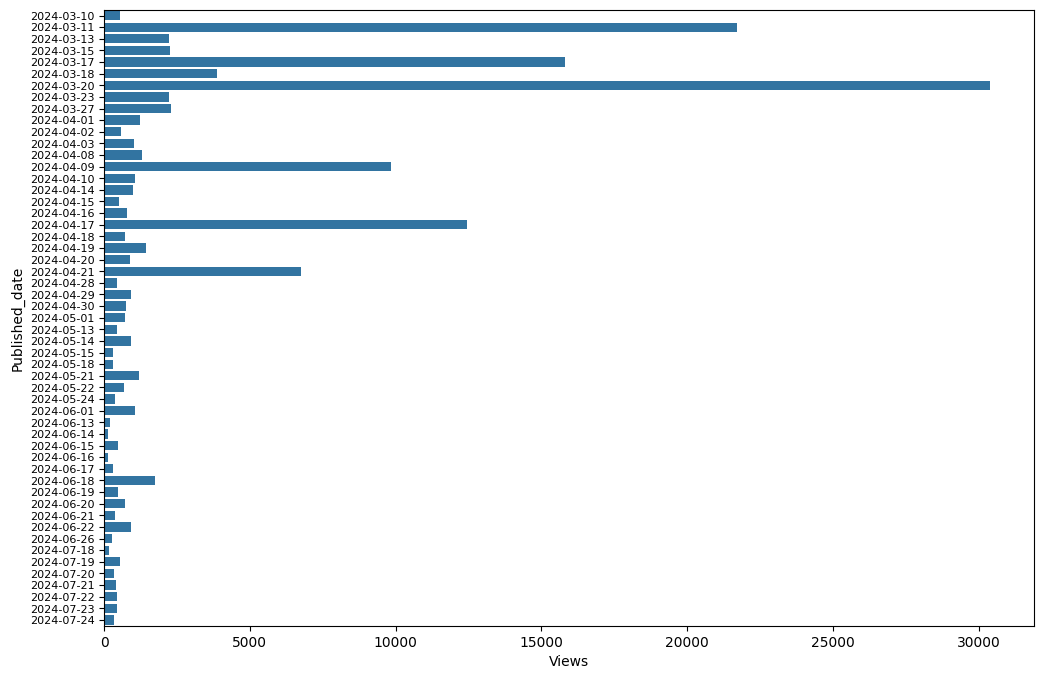

In [188]:
import matplotlib.pyplot as plt

# Adjust plot size
plt.figure(figsize=(12, 8))

# Create the barplot
ax1 = sns.barplot(x='Views', y='Published_date', data=videosInOrder)

# Format the y-axis labels (dates)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=8)  # Set smaller font size for readability

# Show the plot
plt.show()


In [189]:
effort_df = pd.read_excel("effort_values.xlsx")
effort_df.reset_index(drop=True, inplace=True)

<ipython-input-191-e69ac94efe89>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)  # Adjust y-axis label size


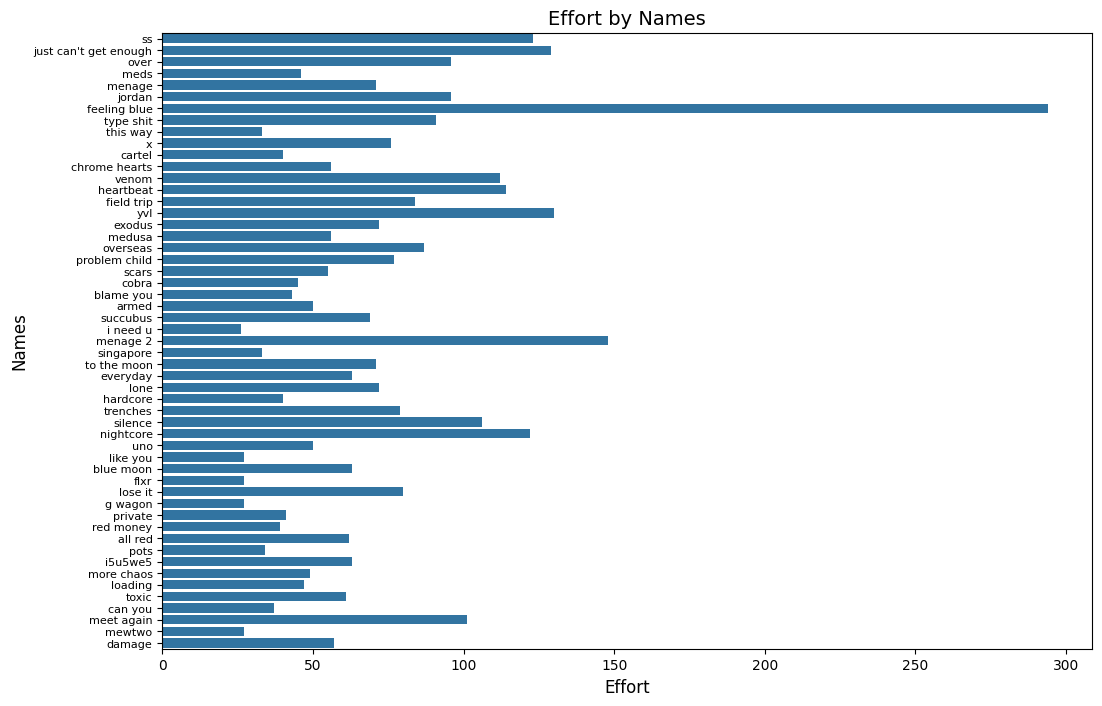

In [191]:
# Plot the barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Effort", y="Name", data=df, orient="h")

# Improve readability
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)  # Adjust y-axis label size
plt.title("Effort by Names", fontsize=14)
plt.xlabel("Effort", fontsize=12)
plt.ylabel("Names", fontsize=12)

# Show the plot
plt.show()


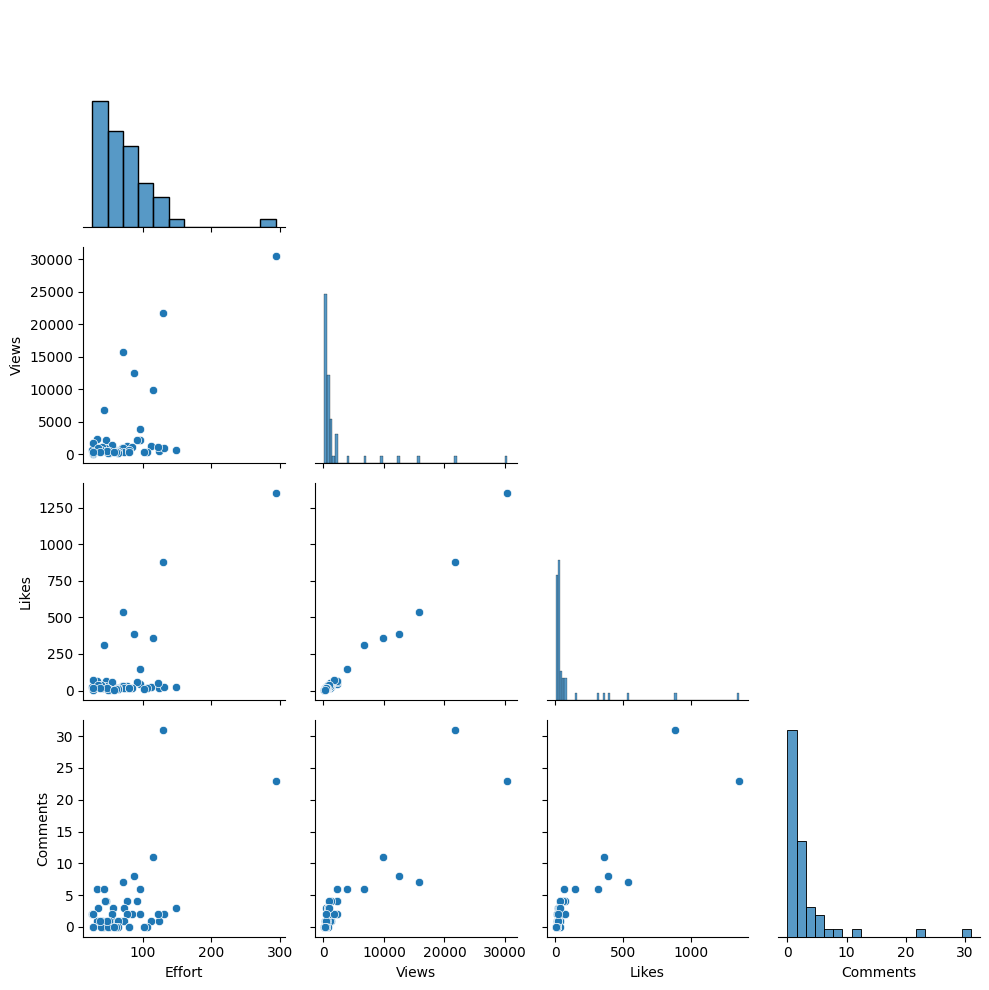

In [198]:

# Read the data from the Excel file
file_path = "effort_values.xlsx"
df = pd.read_excel(file_path)

# Plot a pairplot of the numeric columns
sns.pairplot(df[["Effort", "Views", "Likes", "Comments"]], corner=True)
plt.tight_layout()
plt.show()


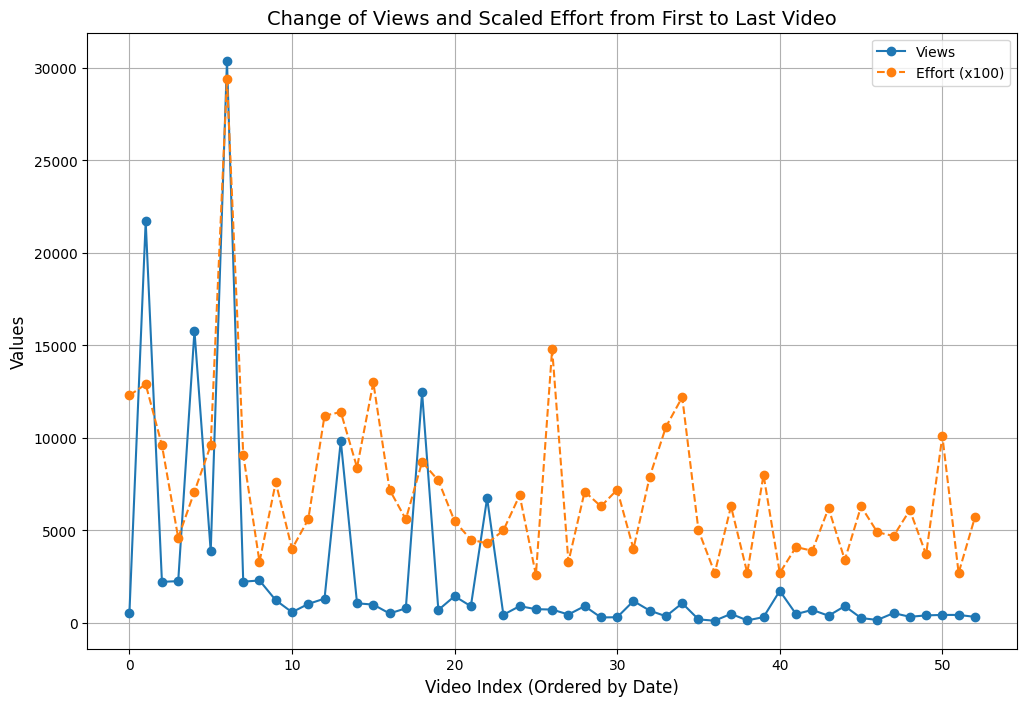

In [199]:

file_path = "effort_values.xlsx"
df = pd.read_excel(file_path)

df["Effort_scaled"] = df["Effort"] * 100

plt.figure(figsize=(12, 8))

plt.plot(df.index, df['Views'], label='Views', marker='o', linestyle='-')
plt.plot(df.index, df['Effort_scaled'], label='Effort (x100)', marker='o', linestyle='--')

plt.title('Change of Views and Scaled Effort from First to Last Video', fontsize=14)
plt.xlabel('Video Index (Ordered by Date)', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()


                            OLS Regression Results                            
Dep. Variable:                  Views   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     37.05
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           1.50e-07
Time:                        18:01:17   Log-Likelihood:                -517.89
No. Observations:                  53   AIC:                             1040.
Df Residuals:                      51   BIC:                             1044.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3369.4707   1145.122     -2.942

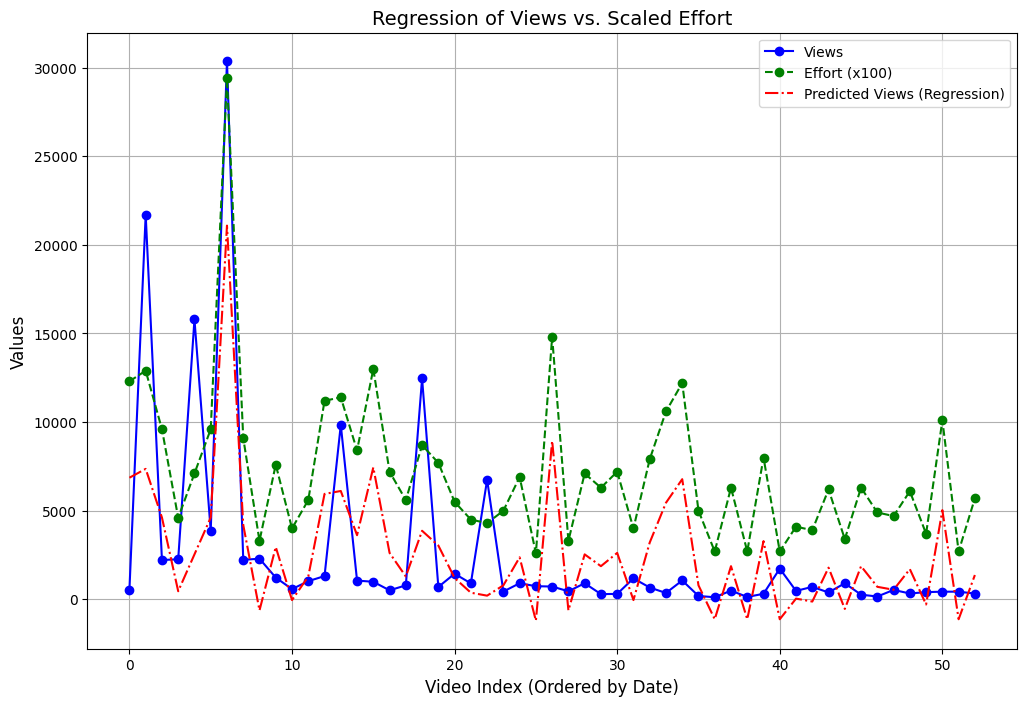

In [200]:

file_path = "effort_values.xlsx"
df = pd.read_excel(file_path)

df["Effort_scaled"] = df["Effort"] * 100


X = df["Effort_scaled"]
y = df["Views"]


X = sm.add_constant(X)
model = sm.OLS(y, X).fit()


print(model.summary())


df["Predicted_Views"] = model.predict(X)


plt.figure(figsize=(12, 8))


plt.plot(df.index, df['Views'], label='Views', marker='o', linestyle='-', color='blue')
plt.plot(df.index, df['Effort_scaled'], label='Effort (x100)', marker='o', linestyle='--', color='green')


plt.plot(df.index, df['Predicted_Views'], label='Predicted Views (Regression)', linestyle='-.', color='red')


plt.title('Regression of Views vs. Scaled Effort', fontsize=14)
plt.xlabel('Video Index (Ordered by Date)', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend()
plt.grid(True)


plt.show()


In [194]:
import statsmodels.api as sm

X = df["Effort"]
y = df["Views"]

# statsmodels requires adding a constant manually
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Views   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     37.05
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           1.50e-07
Time:                        17:44:43   Log-Likelihood:                -517.89
No. Observations:                  53   AIC:                             1040.
Df Residuals:                      51   BIC:                             1044.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3369.4707   1145.122     -2.942      0.0

In [196]:
import statsmodels.api as sm

X = df["Effort"]
y = df["Likes"]

# statsmodels requires adding a constant manually
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     41.84
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           3.76e-08
Time:                        17:45:30   Log-Likelihood:                -347.83
No. Observations:                  53   AIC:                             699.7
Df Residuals:                      51   BIC:                             703.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -159.6523     46.276     -3.450      0.0

In [197]:
import statsmodels.api as sm

X = df["Effort"]
y = df["Comments"]

# statsmodels requires adding a constant manually
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Comments   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     25.15
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           6.78e-06
Time:                        17:45:41   Log-Likelihood:                -153.45
No. Observations:                  53   AIC:                             310.9
Df Residuals:                      51   BIC:                             314.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1058      1.182     -1.782      0.0